In [83]:
from fractions import Fraction
import numpy as np
import sympy as sp
import matplotlib.pyplot as plt
# This function finds the coefficients of the Adams Bashforth predictor formulae of order 'order'
def Abashcoefficients(order: int)->list:
    A = np.zeros((order, order))
    c = np.ones(order)
    for i in range(order):
        for j in range(order):
            A[i, j] = (j) ** i
        c[i] = Fraction((-1) ** i, i + 1)
    Adamsbashcoefficients = np.linalg.inv(A).dot(c)
    return [str(Fraction(x).limit_denominator()) for x in Adamsbashcoefficients]

# This function finds the coefficients of the Adams Moulton corrector formulae of order 'order'
def Amoultoncoefficients(order: int)-> list:
    A = np.zeros((order, order))
    c = np.ones(order)
    for i in range(order):
        for j in range(order):
            A[i, j] = (j - 1) ** i
        c[i] = Fraction((-1) ** i, i + 1)
    solution = np.linalg.inv(A).dot(c)
    AdamsMoultonmoultonCoefficients = [str(Fraction(x).limit_denominator()) for x in solution]
    return AdamsMoultonmoultonCoefficients

def rk4(t, y, h, f):
    k1 = h * f(t, y)
    k2 = h * f(t + h/2, y + k1/2)
    k3 = h * f(t + h/2, y + k2/2)
    k4 = h * f(t + h, y + k3)
    return y + (k1 + 2*k2 + 2*k3 + k4) / 6
order = 4
Abashcoefficients(order)

['55/24', '-59/24', '37/24', '-3/8']

In [55]:
order = 3
tmp = Abashcoefficients(order)
Adams_bashforth = [float(Fraction(x)) for x in tmp]
tmp = Amoultoncoefficients(order+1)
Adams_moulton = [float(Fraction(x)) for x in tmp]
print(Adams_bashforth)
print(Adams_moulton)

[1.9166666666666667, -1.3333333333333333, 0.4166666666666667]
[0.375, 0.7916666666666666, -0.20833333333333334, 0.041666666666666664]


Phương trình vi phân

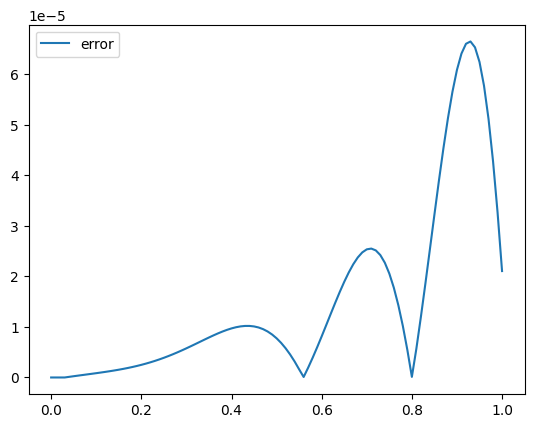

In [85]:
import numpy as np

# Define your differential equation here
def f(t, y):
    return -np.exp(-t)*(np.cos(8*t**2)+16*t*np.sin(8*t**2))
def exact(t):
    return np.exp(-t)*np.cos(8*t**2)
# Define the Adams-Bashforth method
def AdamsBashforth(order: int, num_steps: int, t_start: float, t_end: float, y_start: float, Adams_bashforth: list):
    h = (t_end - t_start) / num_steps
    # Initialize arrays to store the time points and solution values
    t = np.linspace(t_start, t_end, num_steps + 1)
    y = np.zeros(num_steps + 1)
    y[0] = y_start

    # Perform the initial RK4 steps
    for i in range(1, order):
        y[i] = rk4(t[i-1], y[i-1], h, f)
    for i in range(order, num_steps+1):
        # Predictor step using Adams-Bashforth method
        y_pred = y[i-1] + h * np.dot(np.array([f(t[i-j], y[i-j]) for j in range(1, order+1)]), np.array(Adams_bashforth))
        # Update y[i] with the predicted value
        y[i] = y_pred
    return t, y
# Define the Adams Moulton method
def AdamsMoulton(order: int, num_steps:int , t_start:float, t_end:float, y_start:float, adams_moulton_coeffs:list):
    def g(y_fixpoint, y, i, t, h, order, adams_moulton_coeffs):
        term = np.array([f(t[i-j], y[i-j]) for j in range(order+1)])
        return y[i-1] + h * np.dot(term, np.array(adams_moulton_coeffs))
    h = (t_end - t_start) / num_steps
    t = np.linspace(t_start, t_end, num_steps + 1)
    y = np.zeros(num_steps + 1)
    y[0] = y_start

    # Perform the initial RK4 steps
    for i in range(1, order):
        y[i] = rk4(t[i-1], y[i-1], h, f)
     
    for i in range(order, num_steps+1):
        y_corr = y[i-1]
        y[i] = y_corr
        while True:
            y_new = g(y_corr, y, i, t, h, order, adams_moulton_coeffs)
            if abs(y_new - y_corr) < 1e-9:  # Convergence criterion
                break
            y_corr = y_new

        # Update y[i] with the corrected value
        y[i] = y_corr

    return t, y

# Define the Adams-Bashforth-Moulton method
def AdamsBashforthMoulton1(order: int, num_steps: int, t_start: float, t_end: float, y_start: float, Adams_bashforth: list, Adams_moulton: list):
    h = (t_end - t_start) / num_steps
    # Initialize arrays to store the time points and solution values
    t = np.linspace(t_start, t_end, num_steps + 1)
    y = np.zeros(num_steps + 1)
    y[0] = y_start

    # Perform the initial RK4 steps
    for i in range(1, order):
        y[i] = rk4(t[i-1], y[i-1], h, f)
    for i in range(order, num_steps+1):
        # Predictor step using Adams-Bashforth method
        y_pred = y[i-1] + h * np.dot(np.array([f(t[i-j], y[i-j]) for j in range(order)]), np.array(Adams_bashforth))
        y[i] = y_pred
        # Corrector step using Adams-Moulton method
        y_corr = y[i-1] + h * np.dot(np.array([f(t[i-j], y[i-j]) for j in range(order+1)]), np.array(Adams_moulton))
        while (abs(y_corr-y_pred)>=1e-9):
            y_pred =  y_corr
            y_corr = y[i-1] + h * np.dot(np.array([f(t[i-j], y[i-j]) for j in range(order+1)]), np.array(Adams_moulton))
        # Update y[i] with the corrected value
        y[i] = y_corr
        
    return t, y
order = 4
tmp = Abashcoefficients(order)
Adams_bashforth = [float(Fraction(x)) for x in tmp]
tmp = Amoultoncoefficients(order+1)
Adams_moulton = [float(Fraction(x)) for x in tmp]
# Use the Adams-Bashforth-Moulton method to solve the differential equation
t, y = AdamsBashforth(order, 100, 0, 1, 1, Adams_bashforth)
# plt.plot(t,y, label="AB-AM")
# plt.plot(t,exact(t), label="exact")
plt.plot(t, abs(y-exact(t)),label="error")
plt.legend()    
plt.show()

pp lưới phủ

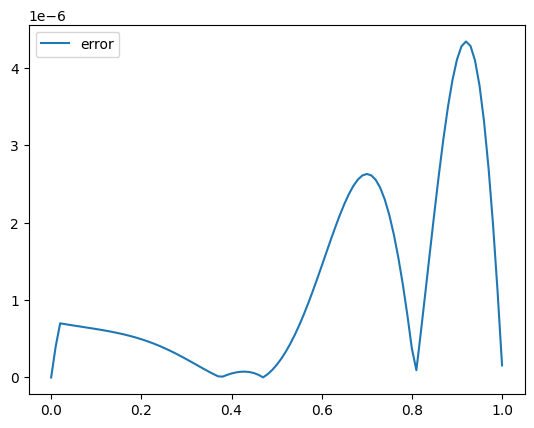

In [34]:
# Define your differential equation here
def f(t, y):
    return -np.exp(-t)*(np.cos(8*t**2)+16*t*np.sin(8*t**2))
def AdamsBashforthMoulton2(order: int, num_steps: int, t_start: float, t_end: float, y_start: float, Adams_bashforth: list, Adams_moulton: list):
    h = (t_end - t_start) / num_steps
    # Initialize arrays to store the time points and solution values
    t = np.linspace(t_start, t_end, num_steps + 1)
    y = np.zeros(num_steps + 1)
    y[0] = y_start

    # Perform the initial steps using lower order AB-AM methods
    for i in range(1, order):
        # Predictor step using Adams-Bashforth method
        y_pred = y[i-1] + h * np.dot(np.array([f(t[i-j], y[i-j]) for j in range(i)]), np.array(Adams_bashforth[i-1]))
        y[i] = y_pred
        # Corrector step using Adams-Moulton method
        y_corr = y[i-1] + h * np.dot(np.array([f(t[i-j], y[i-j]) for j in range(i+1)]), np.array(Adams_moulton[i-1]))
        
        while (abs(y_corr-y_pred)>=1e-9):
            y_pred =  y_corr
            y_corr = y[i-1] + h * np.dot(np.array([f(t[i-j], y[i-j]) for j in range(i+1)]), np.array(Adams_moulton[i-1]))
        # Update y[i] with the corrected value
        y[i] = y_corr

    # Perform the remaining steps using the order-th AB-AM method
    for i in range(order, num_steps+1):
        # Predictor step using Adams-Bashforth method
        y_pred = y[i-1] + h * np.dot(np.array([f(t[i-j], y[i-j]) for j in range(order)]), np.array(Adams_bashforth[order-1]))
        y[i] = y_pred
        # Corrector step using Adams-Moulton method
        y_corr = y[i-1] + h * np.dot(np.array([f(t[i-j], y[i-j]) for j in range(order+1)]), np.array(Adams_moulton[order-1]))
        while (abs(y_corr-y_pred)>=1e-9):
            y_pred =  y_corr
            y_corr = y[i-1] + h * np.dot(np.array([f(t[i-j], y[i-j]) for j in range(order+1)]), np.array(Adams_moulton[order-1]))
        # Update y[i] with the corrected value
        y[i] = y_corr
    return t, y
# Define the exact solution to the differential equation
def exact(t):
    return np.exp(-t)*np.cos(8*t**2)
order = 3
ab = []
am = []
for i in range(1, order+1):
    tmp = Abashcoefficients(i)
    ab.append([float(Fraction(str(x))) for x in tmp])
for i in range(1, order+1):
    tmp = Amoultoncoefficients(i+1)
    am.append([float(Fraction(str(x))) for x in tmp])
t, y = AdamsBashforthMoulton2(order, 100, 0, 1, 1, ab, am)

y_real =  [exact(i) for i in t]
# plt.plot(t, y_real, label='Exact')
# plt.plot(t,y, label= "AB-AM")
plt.plot(t, abs(y-y_real),label="error")
plt.legend()    
plt.show()

In [45]:
import pandas as pd
import math
def exact(t):
    return -np.sqrt(5/3)*(np.exp(2*np.sqrt(15)*t)-1)/(np.exp(2*np.sqrt(15)*t)+1)
def f(t, y):
    return 3*y**2-5
order = 4
# tmp = Abashcoefficients(order)
# Adams_bashforth = [float(Fraction(x)) for x in tmp]
# tmp = Amoultoncoefficients(order+1)
# Adams_moulton = [float(Fraction(x)) for x in tmp]
ab = []
am = []
for i in range(1, order+1):
    tmp = Abashcoefficients(i)
    ab.append([float(Fraction(str(x))) for x in tmp])
for i in range(1, order+1):
    tmp = Amoultoncoefficients(i+1)
    am.append([float(Fraction(str(x))) for x in tmp])
t_start = 0
t_end = 1
h = 1/4
y0 = 0
e_pre, e_last = (-1, -1)
h_values = []
max_diff_values = []
eoc_values = []
while h>1e-5:
    num_steps = math.floor((t_end - t_start) /h)
    e_pre = e_last
    # t, y = AdamsBashforthMoulton1(order, num_steps, t_start, t_end, y0, Adams_bashforth, Adams_moulton)
    t, y = AdamsBashforthMoulton2(order, num_steps, t_start, t_end, y0, ab, am)
    df_sol = pd.DataFrame({'t': t, 'y': y})

    y_real= [exact(i) for i in t]
    df_real = pd.DataFrame({'t': t, 'y': y_real})
    diff = abs(df_sol['y'] - df_real['y'])
    # Find the maximum absolute difference
    max_diff = diff.max()
    e_last = max_diff
    if h==1/2:
        print(h,"|", max_diff,"|")
        h/=2
        continue
    print(h,"|", max_diff,"|", abs(np.log(e_pre)-np.log(e_last))/np.log(2))
    max_diff_values.append(max_diff)
    eoc_values.append(abs(np.log(e_pre)-np.log(e_last))/np.log(2))
    h_values.append(h)
    h /= 2
df = pd.DataFrame({
    'h': h_values,
    'max_diff': max_diff_values,
    'eoc': eoc_values
})

# Write the DataFrame to a CSV file
df.to_csv('results.csv', index=False)


/tmp/ipykernel_3200/3557755447.py:45: RuntimeWarning: invalid value encountered in log
  print(h,"|", max_diff,"|", abs(np.log(e_pre)-np.log(e_last))/np.log(2))
/tmp/ipykernel_3200/3557755447.py:47: RuntimeWarning: invalid value encountered in log
  eoc_values.append(abs(np.log(e_pre)-np.log(e_last))/np.log(2))


0.25 | 3.1243551981999875 | nan
0.125 | 0.6397949854486772 | 2.2878768881727365
0.0625 | 0.23253859160307755 | 1.4601395223716336
0.03125 | 0.12049101259891182 | 0.9485446225201939
0.015625 | 0.06108158115083184 | 0.9801162269573407
0.0078125 | 0.030698686515791218 | 0.9925604787709091
0.00390625 | 0.015380419483187913 | 0.9970820776079595
0.001953125 | 0.007696785253473504 | 0.9987669510569871
0.0009765625 | 0.0038498777406537066 | 0.9994433641824796
0.00048828125 | 0.0019252896870760594 | 0.9997370953032026
0.000244140625 | 0.0009627299509371579 | 0.9998724570165792
0.0001220703125 | 0.0004813859252610353 | 0.9999372129142311
6.103515625e-05 | 0.00024069815903993153 | 0.9999688534592568
3.0517578125e-05 | 0.00012035037348612221 | 0.9999844885517295
1.52587890625e-05 | 6.017550960035756e-05 | 0.9999922595442374


In [ ]:
df

Hệ ptvp

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


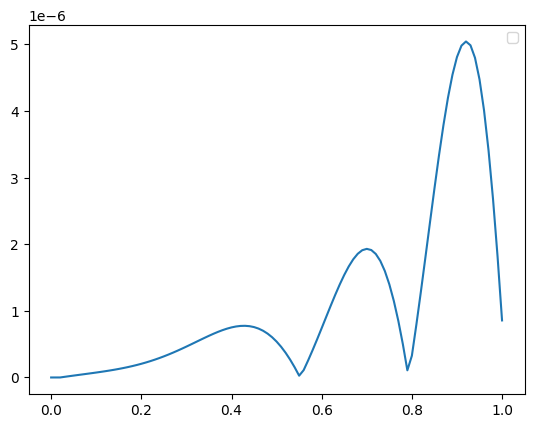

In [35]:
import matplotlib.pyplot as plt
# Define the system of differential equations
def f(t, y):
    # beta = 0.39
    # gamma = 0.1
    # N = 1.1e7
    # y1, y2, y3 = y
    # dy1_dt = -beta*y1*y2/N
    # dy2_dt = beta*y1*y2/N-gamma*y2
    # dy3_dt = gamma*y2
    y1 = y
    dy1_dt = -np.exp(-t)*(np.cos(8*t**2)+16*t*np.sin(8*t**2))
    return np.array([dy1_dt])
def exactf(t):
    y1 = np.exp(-t)*np.cos(8*t**2)
    return np.array([y1])
# Adams-Bashforth-Moulton method for systems of ODEs
def AdamsBashforthMoulton(order: int, num_steps: int, t_start: float, t_end: float, y_start: np.array, Adams_bashforth: list, Adams_moulton: list):
    h = (t_end - t_start) / num_steps
    t = np.linspace(t_start, t_end, num_steps + 1)
    y = np.zeros((num_steps + 1, len(y_start)))
    y[0] = y_start

    # Perform the initial RK4 steps
    for i in range(1, order):
        y[i] = rk4(t[i-1], y[i-1], h, f)
    for i in range(order, num_steps + 1):
        # Predictor step using Adams-Bashforth method
        y_pred = y[i-1] + h * np.dot(np.array([f(t[i-j], y[i-j]) for j in range(order)]).T, np.array(Adams_bashforth))
        y[i] = y_pred
        # Corrector step using Adams-Moulton method
        y_corr = y[i-1] + h * np.dot(np.array([f(t[i-j], y[i-j]) for j in range(order + 1)]).T, np.array(Adams_moulton))

        while np.linalg.norm(y_corr - y_pred) >= 1e-9:
            y_pred = y_corr
            y_corr = y[i-1] + h * np.dot(np.array([f(t[i-j], y[i-j]) for j in range(order + 1)]).T, np.array(Adams_moulton))
        y[i] = y_corr
        
    return t, y
# def perform_initial_steps(order, h, t, y, f):
#     for i in range(1, order):
#         y[i] = rk4(t[i-1], y[i-1], h, f)
#     return y

# def predictor_step(i, order, h, t, y, f, Adams_bashforth):
#     f_vals = np.array([f(t[i-j], y[i-j]) for j in range(order)])
#     y_pred = y[i-1] + h * np.dot(f_vals.T, Adams_bashforth)
#     return y_pred

# def corrector_step(i, order, h, t, y, y_pred, f, Adams_moulton):
#     f_vals = np.array([f(t[i-j], y[i-j]) for j in range(order)])
#     y_corr = y[i-1] + h * np.dot(np.vstack((f(t[i], y_pred), f_vals[:-1])).T, Adams_moulton)
#     # while np.linalg.norm(y_corr - y_pred, np.inf) >= 1e-9:
#     #     y_pred = y_corr
#     #     y_corr = y[i-1] + h * np.dot(np.vstack((f(t[i], y_pred), f_vals[:-1])).T, Adams_moulton)
#     return y_corr

# def AdamsBashforthMoulton(order: int, num_steps: int, t_start: float, t_end: float, y_start: np.array, Adams_bashforth: list, Adams_moulton: list):
#     h = (t_end - t_start) / num_steps
#     t = np.linspace(t_start, t_end, num_steps + 1)
#     y = np.zeros((num_steps + 1, len(y_start)))
#     y[0] = y_start

#     y = perform_initial_steps(order, h, t, y, f)

#     for i in range(order, num_steps + 1):
#         y_pred = predictor_step(i, order, h, t, y, f, Adams_bashforth)
#         y[i] = y_pred
#         y_corr = corrector_step(i, order, h, t, y, y_pred, f, Adams_moulton)
#         y[i] = y_corr

#     return t, y
# Define initial conditions and parameters
order = 3
num_steps = 100
# t_start = 0
# t_end = 100
# N=1.1e7
# y_start = np.array([1])
t_start = 0
t_end = 1
y_start = np.array([1])
# Get Adams-Bashforth and Adams-Moulton coefficients
Adams_bashforth = [float(Fraction(x)) for x in Abashcoefficients(order)]
Adams_moulton = [float(Fraction(x)) for x in Amoultoncoefficients(order+1)]

# Solve the system of differential equations
t, y = AdamsBashforthMoulton(order, num_steps, t_start, t_end, y_start, Adams_bashforth, Adams_moulton)
# plt.plot(t, y, label = "AB-AM")
# plt.plot(t, exactf(t).T, label = "exact")
# error 
# plt.plot(t, y)
# plt.plot(t, exactf(t).T)
plt.plot(t, abs(y-exactf(t).T))
plt.legend()

# Print the solution

# plt.figure(figsize=(10, 6))
# plt.plot(t, y[:,0], label='Dễ bị nhiễm (S)')
# plt.plot(t, y[:,1], label='Nhiễm bệnh (I)')
# plt.plot(t, y[:,2], label='Hồi phục (R)')
# plt.xlabel('Thời gian (ngày)')
# plt.ylabel('Số lượng người')
# plt.title('Mô hình SIR')
# plt.legend()
# plt.grid()

pp lưới phủ 

9.807988526899791e-08

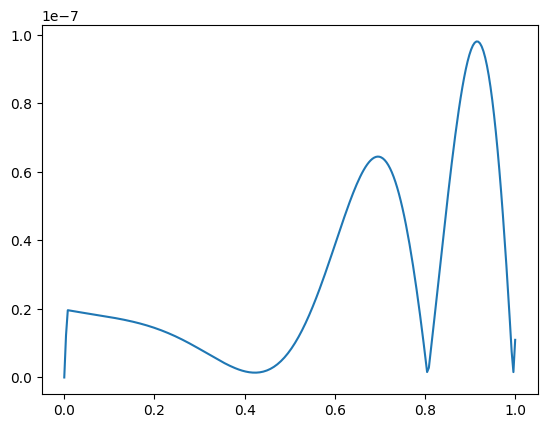

In [15]:
import matplotlib.pyplot as plt
import math
# Define the system of differential equations
def f(t, y):
    y1 = y
    dy1_dt = -np.exp(-t)*(np.cos(8*t**2)+16*t*np.sin(8*t**2))
    return np.array([dy1_dt])
def exactf(t):
    y1 = np.exp(-t)*np.cos(8*t**2)
    return np.array([y1])
# def AdamsBashforthMoultonSystem_p(order, num_steps, t_start, t_end, y_start, Adams_bashforth, Adams_moulton, f):
#     h = (t_end - t_start) / num_steps
#     # Initialize arrays to store the time points and solution values
#     t = np.linspace(t_start, t_end, num_steps + 1)
#     y = np.zeros((num_steps + 1, len(y_start)))
#     y[0, :] = y_start
#     # Perform the initial steps using lower order AB-AM methods
#     for i in range(1, order):
#         # Predictor step using Adams-Bashforth method
#         f_eval_pre = np.array([f(t[i-j], y[i-j, :]) for j in range(i)])
#         y_pred = y[i-1, :] + h * np.dot(f_eval_pre.T, np.array(Adams_bashforth[i-1]))
#         y[i, :] = y_pred
#         # Corrector step using Adams-Moulton method
#         f_eval_corr = np.array([f(t[i-j], y[i-j, :]) for j in range(i+1)])
#         y_corr = y[i-1, :] + h * np.dot(f_eval_corr.T, np.array(Adams_moulton[i-1]))
        
#         while (np.linalg.norm(y_corr - y_pred) >= 1e-9):
#             y_pred = y_corr
#             y_corr = y[i-1, :] + h * np.dot(f_eval_corr.T, np.array(Adams_moulton[i-1]))
#         # Update y[i] with the corrected value
#         y[i, :] = y_corr

#     # Perform the remaining steps using the order-th AB-AM method
#     for i in range(order, num_steps+1):
#         # Predictor step using Adams-Bashforth method
#         f_eval_pre = np.array([f(t[i-j], y[i-j, :]) for j in range(order)])
#         y_pred = y[i-1, :] + h * np.dot(f_eval_pre.T, np.array(Adams_bashforth[order-1]))
#         y[i, :] = y_pred
#         # Corrector step using Adams-Moulton method
#         f_eval_corr = np.array([f(t[i-j], y[i-j, :]) for j in range(order+1)])
#         y_corr = y[i-1, :] + h * np.dot(f_eval_corr.T, np.array(Adams_moulton[order-1]))
        
#         while (np.linalg.norm(y_corr - y_pred) >= 1e-9):
#             y_pred = y_corr
#             y_corr = y[i-1, :] + h * np.dot(f_eval_corr.T, np.array(Adams_moulton[order-1]))
#         # Update y[i] with the corrected value
#         y[i, :] = y_corr

#     return t, y

def initialize_arrays(num_steps, y_start, t_start, t_end):
    h = (t_end - t_start) / num_steps
    t = np.linspace(t_start, t_end, num_steps + 1)
    y = np.zeros((num_steps + 1, len(y_start)))
    y[0, :] = y_start
    return h, t, y
def compute_initial_values(order, h, f, t, y, Adams_bashforth, Adams_moulton):
    for i in range(1, order):
        f_eval_pre = np.array([f(t[i-j], y[i-j, :]) for j in range(i)])
        y_pred = y[i-1, :] + h * np.dot(f_eval_pre.T, np.array(Adams_bashforth[i-1]))
        y[i, :] = y_pred
        f_eval_corr = np.array([f(t[i-j], y[i-j, :]) for j in range(i+1)])
        y_corr = y[i-1, :] + h * np.dot(f_eval_corr.T, np.array(Adams_moulton[i-1]))
        while (np.linalg.norm(y_corr - y_pred) >= 1e-9):
            y_pred = y_corr
            y_corr = y[i-1, :] + h * np.dot(f_eval_corr.T, np.array(Adams_moulton[i-1]))
        y[i, :] = y_corr
    return y
def perform_initial_steps(order, h, t, y, f):
    for i in range(1, order):
        y[i] = rk4(t[i-1], y[i-1], h, f)
    return y
def compute_remaining_values(order, num_steps, h, f, t, y, Adams_bashforth, Adams_moulton):
    for i in range(order, num_steps+1):
        f_eval_pre = np.array([f(t[i-j], y[i-j, :]) for j in range(order)])
        y_pred = y[i-1, :] + h * np.dot(f_eval_pre.T, np.array(Adams_bashforth))
        y[i, :] = y_pred
        f_eval_corr = np.array([f(t[i-j], y[i-j, :]) for j in range(order+1)])
        y_corr = y[i-1, :] + h * np.dot(f_eval_corr.T, np.array(Adams_moulton))
        while (np.linalg.norm(y_corr - y_pred) >= 1e-9):
            y_pred = y_corr
            y_corr = y[i-1, :] + h * np.dot(f_eval_corr.T, np.array(Adams_moulton))
        y[i, :] = y_corr
    return y

def AdamsBashforthMoultonSystem_p(order, num_steps, t_start, t_end, y_start, Adams_bashforth, Adams_moulton, f):
    h, t, y = initialize_arrays(num_steps, y_start, t_start, t_end)
    y = compute_initial_values(order, h, f, t, y, Adams_bashforth, Adams_moulton)
    # y = perform_initial_steps(order, h, t, y, f)
    y = compute_remaining_values(order, num_steps, h, f, t, y, Adams_bashforth[order-1], Adams_moulton[order-1])
    return t, y

order = 3  # Order of the method
h = 0.00390625
# t_start = 0
# t_end = 100
# N=1.1e7
# y_start = np.array([1])
t_start = 0
t_end = 1
y_start = np.array([1])
num_steps = math.floor((t_end - t_start) /h)
ab = []
am = []

for i in range(1, order+1):
    tmp = Abashcoefficients(i)
    ab.append([float(Fraction(x)) for x in tmp])
for i in range(1, order+1):
    tmp = Amoultoncoefficients(i+1)
    am.append([float(Fraction(x)) for x in tmp])
t,y = AdamsBashforthMoultonSystem_p(order, num_steps, t_start, t_end, y_start, ab, am,f)
# plt.plot(t,y)
y_real = np.array([exactf(i) for i in t])
# plt.plot(t,y)
plt.plot(t, abs(y-exactf(t).T), label = "error")
np.max(abs(y-exactf(t).T))

0.015625


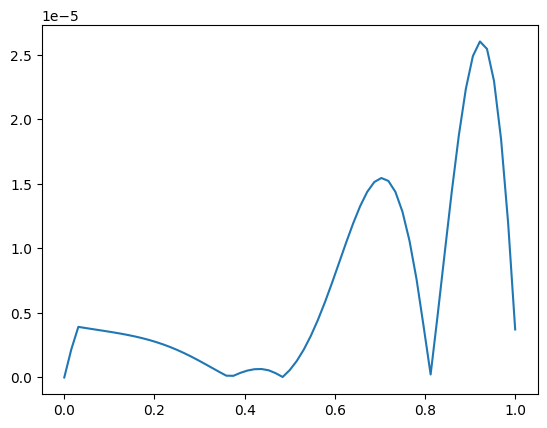

In [28]:
import math
def creABAM(order: int):
    ab = []
    am = []
    for i in range(1, order+1):
        tmp = Abashcoefficients(i)
        ab.append([float(Fraction(x)) for x in tmp])
    for i in range(1, order+1):
        tmp = Amoultoncoefficients(i+1)
        am.append([float(Fraction(x)) for x in tmp])
    return ab, am

def split_array(arr, n):
    for _ in range(n):
        new_arr = []
        for i in range(len(arr) - 1):
            new_arr.append(arr[i])
            new_arr.append((arr[i] + arr[i+1]) // 2)
        new_arr.append(arr[-1])
        arr = new_arr
    return arr
def common_elements(arr1, arr2):
    return list(set(arr1) & set(arr2))
def splits_and_common(arr, n):
    # Perform the splits and find common elements
    for i in range(1, n+1):
        new_arr = split_array(arr, 1)
        if i==n:
            break
        arr = new_arr
    return common_elements(arr, new_arr)
def combinefinal(n_h, t_start, t_end):
    h = 1/2**(2+n_h)
    # Start with an initial array
    arr = [0, math.floor((t_end - t_start) /h)]
    n = 2+n_h
    return splits_and_common(arr, n)

def f(t, y):
    y1 = y
    dy1_dt = -np.exp(-t)*(np.cos(8*t**2)+16*t*np.sin(8*t**2))
    return np.array([dy1_dt])
def sol_know_e(t_start, t_end, order, y_start, e, f):
    h = 1/4
    n_h = 0
    # Start with an initial array
    arr = [0, math.floor((t_end - t_start) /h)]
    ab, am = creABAM(order)
    num_steps = math.floor((t_end - t_start) /h)
    t, y = AdamsBashforthMoultonSystem_p(order, num_steps, t_start, t_end, y_start, ab, am,f)
    # print(y.shape)
    # print(combinefinal(n_h, t_start, t_end))
    while h>1e-5:
        y_pre = y
        h /=2
        num_steps = math.floor((t_end - t_start) /h)
        t, y = AdamsBashforthMoultonSystem_p(order, num_steps, t_start, t_end, y_start, ab, am,f)
        y_last = y
        ss = np.array([abs(y_pre[i]-y_last[i*2]) for i in combinefinal(n_h, t_start, t_end)])
        n_h += 1
        # print(np.max(ss))
        #e*y_pre[np.argmax(ss)]
        if np.max(ss) < e:
            print(h)
            break
    return t, y
t, y = sol_know_e(0, 1, 3, np.array([1]), 1e-3, f)
plt.plot(t, abs(y-exactf(t).T), label = "error")

In [65]:
h=1/4
while h>1e-5:
    h/=2
h

7.62939453125e-06

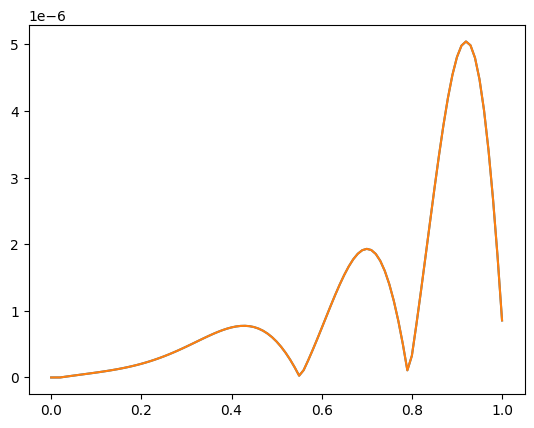

In [87]:
import numpy as np


# def AdamsMoultonSystem(order: int, num_steps:int , t_start:float, t_end:float, y_start:np.ndarray, adams_moulton_coeffs:list):
#     def g(y_fixpoint, y, i, t, h, order, adams_moulton_coeffs):
#         term = np.array([f(t[i-j], y[i-j]) for j in range(order+1)])
#         return y[i-1] + h * np.dot(term.T, np.array(adams_moulton_coeffs))
#     h = (t_end - t_start) / num_steps
#     t = np.linspace(t_start, t_end, num_steps + 1)
#     y = np.zeros((num_steps + 1, len(y_start)))
#     y[0] = y_start

#     # Perform the initial RK4 steps
#     for i in range(1, order):
#         y[i] = rk4(t[i-1], y[i-1], h, f)
     
#     for i in range(order, num_steps+1):
#         y_corr = y[i-1]
#         y[i] = y_corr
#         while True:
#             y_new = g(y_corr, y, i, t, h, order, adams_moulton_coeffs)
#             if np.linalg.norm(y_new - y_corr) < 1e-9:  # Convergence criterion
#                 break
#             y_corr = y_new

#         # Update y[i] with the corrected value
#         y[i] = y_corr

#     return t, y

def compute_remaining_values_usingAM(order, num_steps, h, f, t, y, Adams_moulton):
    def g(y_fixpoint, y, i, t, h, order, adams_moulton_coeffs):
        term = np.array([f(t[i-j], y[i-j]) for j in range(order+1)])
        return y[i-1] + h * np.dot(term.T, np.array(adams_moulton_coeffs))
    for i in range(order, num_steps+1):
        y_corr = y[i-1]
        y[i] = y_corr
        while True:
            y_new = g(y_corr, y, i, t, h, order, Adams_moulton)
            if np.linalg.norm(y_new - y_corr) < 1e-9:  # Convergence criterion
                break
            y_corr = y_new
        y[i] = y_corr
    return y
def compute_remaining_values_usingAB(order, num_steps, h, f, t, y, Adams_bashforth):
    for i in range(order, num_steps+1):
        # Predictor step using Adams-Bashforth method
        y_pred = y[i-1] + h * np.dot(np.array([f(t[i-j], y[i-j]) for j in range(1, order+1)]).T, np.array(Adams_bashforth))
        y[i] = y_pred
    return y
def f(t, y):
    y1, y2 = y
    dy1_dt = -np.exp(-t)*(np.cos(8*t**2)+16*t*np.sin(8*t**2))
    dy2_dt = -np.exp(-t)*(np.cos(8*t**2)+16*t*np.sin(8*t**2))
    return np.array([dy1_dt, dy2_dt])
def exactf(t):
    y1 = np.exp(-t)*np.cos(8*t**2)
    y2 = np.exp(-t)*np.cos(8*t**2)
    return np.array([y1])
order = 3
tmp = Amoultoncoefficients(order+1)
Adams_moulton = [float(Fraction(x)) for x in tmp]
y_start = np.array([1, 0])
t, y = AdamsMoultonSystem(order, 100, 0, 1, np.array([1, 1]), Adams_moulton)
plt.plot(t, abs(y-exactf(t).T), label = "error")


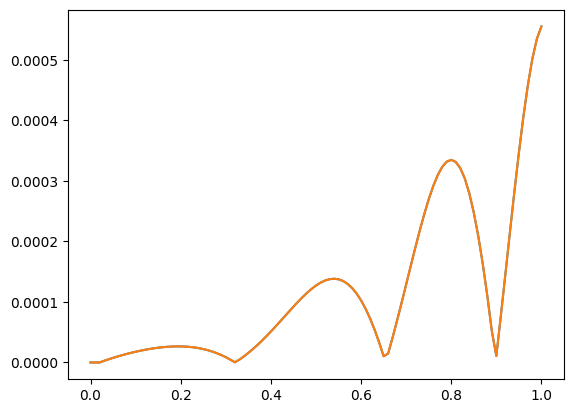

In [95]:
import numpy as np

def initialize_arrays(num_steps, y_start, t_start, t_end):
    h = (t_end - t_start) / num_steps
    t = np.linspace(t_start, t_end, num_steps + 1)
    y = np.zeros((num_steps + 1, len(y_start)))
    y[0, :] = y_start
    return h, t, y

def compute_initial_values(order, h, f, t, y, Adams_bashforth, Adams_moulton):
    for i in range(1, order):
        f_eval_pre = np.array([f(t[i-j], y[i-j, :]) for j in range(i)])
        y_pred = y[i-1, :] + h * np.dot(f_eval_pre.T, np.array(Adams_bashforth[i-1]))
        y[i, :] = y_pred
        f_eval_corr = np.array([f(t[i-j], y[i-j, :]) for j in range(i+1)])
        y_corr = y[i-1, :] + h * np.dot(f_eval_corr.T, np.array(Adams_moulton[i-1]))
        while (np.linalg.norm(y_corr - y_pred) >= 1e-9):
            y_pred = y_corr
            y_corr = y[i-1, :] + h * np.dot(f_eval_corr.T, np.array(Adams_moulton[i-1]))
        y[i, :] = y_corr
    return y
def perform_initial_steps(order, h, t, y, f):
    for i in range(1, order):
        y[i] = rk4(t[i-1], y[i-1], h, f)
    return y
def compute_remaining_values(order, num_steps, h, f, t, y, Adams_bashforth, Adams_moulton):
    for i in range(order, num_steps+1):
        f_eval_pre = np.array([f(t[i-j], y[i-j, :]) for j in range(order)])
        y_pred = y[i-1, :] + h * np.dot(f_eval_pre.T, np.array(Adams_bashforth))
        y[i, :] = y_pred
        f_eval_corr = np.array([f(t[i-j], y[i-j, :]) for j in range(order+1)])
        y_corr = y[i-1, :] + h * np.dot(f_eval_corr.T, np.array(Adams_moulton))
        while (np.linalg.norm(y_corr - y_pred) >= 1e-9):
            y_pred = y_corr
            y_corr = y[i-1, :] + h * np.dot(f_eval_corr.T, np.array(Adams_moulton))
        y[i, :] = y_corr
    return y

def AdamsBashforthMoultonSystem(order, num_steps, t_start, t_end, y_start, Adams_bashforth, Adams_moulton, f):
    h, t, y = initialize_arrays(num_steps, y_start, t_start, t_end)
    # y = compute_initial_values(order, h, f, t, y, Adams_bashforth, Adams_moulton)
    y = perform_initial_steps(order, h, t, y, f)
    # y = compute_remaining_values(order, num_steps, h, f, t, y, Adams_bashforth[order-1], Adams_moulton[order-1])
    # y = compute_remaining_values_usingAM(order, num_steps, h, f, t, y, Adams_moulton[order-1])
    y = compute_remaining_values_usingAB(order, num_steps, h, f, t, y, Adams_bashforth[order-1])
    return t, y
# Example usage:
# Define the system of ODEs as a function
def f(t, y):
    y1, y2 = y
    dy1_dt = -np.exp(-t)*(np.cos(8*t**2)+16*t*np.sin(8*t**2))
    dy2_dt = -np.exp(-t)*(np.cos(8*t**2)+16*t*np.sin(8*t**2))
    return np.array([dy1_dt, dy2_dt])
def exactf(t):
    y1 = np.exp(-t)*np.cos(8*t**2)
    y2 = np.exp(-t)*np.cos(8*t**2)
    return np.array([y1])
# Initial conditions
order = 3
num_steps = 100
t_start = 0.0
t_end = 1.0
y_start = np.array([1.0, 1.0])

ab, am = creABAM(order)
# Solve the system
t, y = AdamsBashforthMoultonSystem(order, num_steps, t_start, t_end, y_start, ab, am, f)
plt.plot(t, abs(y-exactf(t).T))
# t contains the time points, and y contains the solution vectors at those time points


In [68]:
import numpy as np

def rk4(t, y, h, f):
    k1 = h * f(t, y)
    k2 = h * f(t + h/2, y + k1/2)
    k3 = h * f(t + h/2, y + k2/2)
    k4 = h * f(t + h, y + k3)
    return y + (k1 + 2*k2 + 2*k3 + k4) / 6
def AdamsMoulton(order: int, num_steps:int , t_start:float, t_end:float, y_start:float, adams_moulton_coeffs:list):
    def g(y_fixpoint, y, i, t, h, order, adams_moulton_coeffs):
        term = np.concatenate((np.array([f(t[i],y_fixpoint)]),np.array([f(t[i-j], y[i-j]) for j in range(order)])))
        return y[i-1] + h * np.dot(term, np.array(adams_moulton_coeffs))
    h = (t_end - t_start) / num_steps
    t = np.linspace(t_start, t_end, num_steps + 1)
    y = np.zeros(num_steps + 1)
    y[0] = y_start

    # Perform the initial RK4 steps
    for i in range(1, order):
        y[i] = rk4(t[i-1], y[i-1], h, f)
     
    for i in range(order, num_steps+1):
        y_corr = y[i-1]
        while True:
            y_new = g(y_corr, y, i, t, h, order, adams_moulton_coeffs)
            if abs(y_new - y_corr) < 1e-9:  # Convergence criterion
                break
            y_corr = y_new

        # Update y[i] with the corrected value
        y[i] = y_corr

    return t, y
def f(t, y):
    y1, y2 = y
    dy1_dt = -np.exp(-t)*(np.cos(8*t**2)+16*t*np.sin(8*t**2))
    dy2_dt = 3*y1**2-5
    return np.array([dy1_dt, dy2_dt])
def exactf(t):
    y1 = np.exp(-t)*np.cos(8*t**2)
    return np.array([y1])
order = 3
t_start = 0
t_end = 1
tmp = Amoultoncoefficients(order+1)
Adams_moulton = [float(Fraction(x)) for x in tmp]
y_start = np.array([1, 0])
t, y = AdamsMoulton(order, num_steps, t_start, t_end, y_start, Adams_moulton)

# t contains the time steps
# y contains the solution vectors at each time step
plt.plot(t, y)


ValueError: setting an array element with a sequence.